In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Kaggle/data.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/images_012/images/00028897_016.png  
  inflating: /content/images_012/images/00028897_017.png  
  inflating: /content/images_012/images/00028897_018.png  
  inflating: /content/images_012/images/00028897_019.png  
  inflating: /content/images_012/images/00028897_020.png  
  inflating: /content/images_012/images/00028898_000.png  
  inflating: /content/images_012/images/00028899_000.png  
  inflating: /content/images_012/images/00028899_001.png  
  inflating: /content/images_012/images/00028899_002.png  
  inflating: /content/images_012/images/00028900_000.png  
  inflating: /content/images_012/images/00028901_000.png  
  inflating: /content/images_012/images/00028901_001.png  
  inflating: /content/images_012/images/00028902_000.png  
  inflating: /content/images_012/images/00028902_001.png  
  inflating: /content/images_012/images/00028902_002.png  
  inflating: /content/images_012/images/00028902_003.png  
  inf

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from cv2 import imread, createCLAHE # read and equalize images
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.core.common import flatten

import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [ ]:
from __future__ import print_function, division

# pytorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# image imports
from skimage import io, transform
from PIL import Image

# general imports
import os
import time
from shutil import copyfile
from shutil import rmtree

# data science imports
import pandas as pd
import numpy as np
import csv

In [ ]:
%matplotlib inline
# All imports
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import softmax, interpolate
from torchvision.io.image import read_image
from torchvision.models import resnet18, densenet121, resnet50
from torchvision.transforms.functional import normalize, resize, to_pil_image

In [ ]:
from itertools import chain
import random
np.random.seed(25)

df = pd.read_csv('/content/Data_Entry_2017.csv')
df.drop(['OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'], axis=1, inplace=True)
num_obs = len(df)
# print('Number of observations:',num_obs)

my_glob = glob('/content/images*/images/*.png')
# print('Number of Observations: ', len(my_glob))

full_img_paths = {os.path.basename(x): x for x in my_glob}
df['full_path'] = df['Image Index'].map(full_img_paths.get)

train_val_list = pd.read_csv('/content/train_val_list.txt', header=None, names = ['image_list'])
test_list = pd.read_csv('/content/test_list.txt', header=None, names = ['image_list'])

train = df[df['Image Index'].isin(train_val_list['image_list'].values)].reset_index(drop=True)
test = df[df['Image Index'].isin(test_list['image_list'].values)].reset_index(drop=True)

labels_discard = ['Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Hernia', 'Pleural_Thickening']
for i in labels_discard:
    train = train[~train['Finding Labels'].str.contains(i)]
    test = test[~test['Finding Labels'].str.contains(i)]

# train = pd.concat([train[~train['Finding Labels'].str.contains('No Finding')],
#                   train[train['Finding Labels'].str.contains('No Finding')].drop_duplicates(subset=['Finding Labels', 'Patient ID', 'View Position'], keep='first')]).sort_values(by='Image Index')

def one_hot_enc(df):
    df['Finding Labels'] = df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
    all_labels = np.unique(list(chain(*df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
    for c_label in all_labels:
        if len(c_label)>1: # leave out empty labels
            df[c_label] = df['Finding Labels'].map(lambda finding: 1 if c_label in finding else 0)
    return df

train = one_hot_enc(train)
test = one_hot_enc(test)

train_image_paths = list(flatten(train['full_path'].values))
test_image_paths = list(flatten(test['full_path'].values))

l = np.unique(train['Patient ID'].values)
np.random.shuffle(l)
cut = int(np.round(((90/100)*len(l)), decimals=0))
train_values = l[:cut]
val_values = l[cut:]
train_dict = dict.fromkeys(train_values, 'train')
train_dict.update(dict.fromkeys(val_values, 'val'))
train['fold'] = train['Patient ID'].map(train_dict.get)

train = train[['full_path', 'Image Index', 'fold', 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration',
               'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']]
test['fold'] = 'test'
test = test[['full_path', 'Image Index', 'fold', 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration',
             'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']]
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [ ]:
len(df_box)

984

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import os

df_box = pd.read_csv('/content/BBox_List_2017.csv')
df_box['xmin'] = df_box['Bbox [x']
df_box['ymin'] = df_box['y']
# df_box['xmax'] = df_box['xmin'] + df_box['w']
# df_box['ymax'] = df_box['ymin'] + df_box['h]']
df_box['w'] = df_box['w']
df_box['h'] = df_box['h]']

my_glob = glob('/content/images*/images/*.png')
# print('Number of Observations: ', len(my_glob))

full_img_paths = {os.path.basename(x): x for x in my_glob}
df_box['full_path'] = df_box['Image Index'].map(full_img_paths.get)

df_box = df_box[['full_path', 'Image Index', 'Finding Label', 'xmin', 'ymin', 'w', 'h']]
# df_box['xmin'] = df_box['xmin'].round()
# df_box['ymin'] = df_box['ymin'].round()
# df_box['xmax'] = df_box['xmax'].round()
# df_box['ymax'] = df_box['ymax'].round()
df_box.head()

,full_path,Image Index,Finding Label,xmin,ymin,w,h
0,/content/images_006/images/00013118_008.png,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,/content/images_007/images/00014716_007.png,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,/content/images_012/images/00029817_009.png,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,/content/images_007/images/00014687_001.png,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,/content/images_008/images/00017877_001.png,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695


In [ ]:
def large_to_small(x1, y1, w1, h1, cropped = True): # convert 1024x1024 to 224x224 (which is center-cropped from 256x256)
    x2 = x1 / 4
    y2 = y1 / 4
    w2 = w1 / 4
    h2 = h1 / 4
    if cropped:
        if x2 < 16:
            x2 = 0
            w2 = w2 - 16
        else:
            x2 = x2 - 16
        if x2 + w2 > 224:
            w2 = 224 - x2
        if y2 < 16:
            y2 = 0
            h2 = h2 - 16
        else:
            y2 = y2 - 16
        if y2 + h2 > 224:
            h2 = 224 - y2
    return int(x2), int(y2), int(w2), int(h2)

def intersect(box_a, box_b):
    A = box_a.size(0)
    B = box_b.size(0)
    max_xy = torch.min(box_a[:, 2:].unsqueeze(1).expand(A, B, 2),
                       box_b[:, 2:].unsqueeze(0).expand(A, B, 2))
    min_xy = torch.max(box_a[:, :2].unsqueeze(1).expand(A, B, 2),
                       box_b[:, :2].unsqueeze(0).expand(A, B, 2))
    inter = torch.clamp((max_xy - min_xy), min=0)
    return inter[:, :, 0] * inter[:, :, 1]

def jaccard(box_a, box_b):
    inter = intersect(box_a, box_b)
    area_a = ((box_a[:, 2]-box_a[:, 0]) *
              (box_a[:, 3]-box_a[:, 1])).unsqueeze(1).expand_as(inter)  # [A,B]
    area_b = ((box_b[:, 2]-box_b[:, 0]) *
              (box_b[:, 3]-box_b[:, 1])).unsqueeze(0).expand_as(inter)  # [A,B]
    union = area_a + area_b - inter
    return inter / union  # [A,B]

def iobb(box_a, box_b):
    inter = intersect(box_a, box_b)
    area_a = ((box_a[:, 2]-box_a[:, 0]) *
              (box_a[:, 3]-box_a[:, 1])).unsqueeze(1).expand_as(inter)  # [A,B]
    area_b = ((box_b[:, 2]-box_b[:, 0]) *
              (box_b[:, 3]-box_b[:, 1])).unsqueeze(0).expand_as(inter)  # [A,B]
#     union = area_a + area_b - inter
    return inter / area_a  # [A,B]

def contains(xywh1, xywh2): # returns True if xywh2 is completely inside xywh1
    x1, x2, x3, x4 = xywh1
    y1, y2, y3, y4 = xywh2
    if y1 < x1:
        return False
    if y2 < x2:
        return False
    if y3 > x3:
        return False
    if y4 > x4:
        return False
    return True

In [ ]:
import torchvision.transforms as T

preprocess = T.Compose([
   T.Resize(224),
   T.CenterCrop(224),
   T.ToTensor(),
   T.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   )
])

convert_tensor = T.Compose([
   T.ToTensor(),
])

In [ ]:
from PIL import Image

class CreateDataset(Dataset):

    def __init__(self, train, transform=None):
        self.df = train
        self.transform = transform

        self.df = self.df.set_index("Image Index")

        RESULT_PATH = "results/"

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        image = Image.open(self.df.iloc[idx, 0])
        image = image.convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

In [ ]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
N_LABELS = 8  # we are predicting 8 labels
data_transforms = {
    'train': transforms.Compose([
#         transforms.RandomHorizontalFlip(),
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

transformed_datasets = {}
transformed_datasets = CreateDataset(df_box, transform=data_transforms['train'])

dataloaders = {}
dataloaders = torch.utils.data.DataLoader(
    transformed_datasets,
    batch_size=32,
    shuffle=True,
    num_workers=8,
    pin_memory=True)

In [ ]:
lung = np.load('/content/drive/MyDrive/56_lung_mask.npy', allow_pickle=True)

lung = lung[0]
lung = lung.to(torch.float32)

# l = []
# for i in range(256):
#     l.append(lung)
# lung = torch.stack(l)
# lung = lung.to(torch.float32)

In [ ]:
centre_lung = np.load('/content/drive/MyDrive/56_center_lung_mask.npy', allow_pickle=True)

centre_lung = centre_lung[0]
centre_lung = centre_lung.to(torch.float32)

# l = []
# for i in range(256):
#     l.append(centre_lung)
# centre_lung = torch.stack(l)
# centre_lung = centre_lung.to(torch.float32)

In [ ]:
masks = np.load('/content/drive/MyDrive/thesis_models/final_fixed_aligned_layercam_normalized_masks.npy', allow_pickle=True)
for i in range(1, 8):
    masks[i] = masks[i].squeeze(0)
for i in range(len(masks)):
    masks[i] = masks[i].to(torch.float32)

# def ptp(t, axis):
#   return t.max(axis).values - t.min(axis).values

# for i in range(len(masks)):
#   mean, std, var = torch.mean(masks[i]), torch.std(masks[i]), torch.var(masks[i])
#   min = torch.min
#   masks[i]  = (masks[i]-mean)/std
# print('-------')
# for i in masks:
#   mean, std, var = torch.mean(i), torch.std(i), torch.var(i)
#   print(mean, std, var)

# temp = []
# for i in range(7):
#     temp1 = [0., 0., 0., 0., 0., 0., 0.]
#     temp.append(temp1)
# masks[6] = torch.Tensor(temp)

l = []
for i in masks:
    l.append(i)
masks = torch.stack(l)

# batch_masks = []
# for i in range(32):
#     batch_masks.append(masks)

# batch_masks = torch.stack(batch_masks).cuda()
# batch_masks = batch_masks.to(torch.float32)

batch_masks = masks.to(torch.float32)

batch_masks[0]

tensor([[0.1269, 0.0097, 0.0000, 0.0362, 0.0000, 0.0097, 0.1269],
        [0.1030, 0.0059, 0.0438, 0.0910, 0.0438, 0.0059, 0.1030],
        [0.1934, 0.2962, 0.3776, 0.4057, 0.3776, 0.2962, 0.1934],
        [0.4862, 0.8128, 0.8464, 0.7842, 0.8464, 0.8128, 0.4862],
        [0.6259, 1.0000, 0.9478, 0.7931, 0.9478, 1.0000, 0.6259],
        [0.3765, 0.5236, 0.4301, 0.3225, 0.4301, 0.5236, 0.3765],
        [0.1344, 0.1049, 0.0632, 0.0433, 0.0632, 0.1049, 0.1344]])

In [ ]:
batch_masks[0]

tensor([[0.1269, 0.0097, 0.0000, 0.0362, 0.0000, 0.0097, 0.1269],
        [0.1030, 0.0059, 0.0438, 0.0910, 0.0438, 0.0059, 0.1030],
        [0.1934, 0.2962, 0.3776, 0.4057, 0.3776, 0.2962, 0.1934],
        [0.4862, 0.8128, 0.8464, 0.7842, 0.8464, 0.8128, 0.4862],
        [0.6259, 1.0000, 0.9478, 0.7931, 0.9478, 1.0000, 0.6259],
        [0.3765, 0.5236, 0.4301, 0.3225, 0.4301, 0.5236, 0.3765],
        [0.1344, 0.1049, 0.0632, 0.0433, 0.0632, 0.1049, 0.1344]])

In [ ]:
from collections import namedtuple
import os
import torch
from torchvision import models
import torch.nn.functional as F
torch.manual_seed(98)

class AlignmentNetwork(torch.nn.Module):
    def __init__(self):
        super(AlignmentNetwork, self).__init__()

        resnet18 = models.resnet18()
        num_ftrs = resnet18.fc.in_features
        resnet18.fc = nn.Linear(num_ftrs, 6)

        self.model  = resnet18


    def forward(self, x):
        theta = self.model(x)
        theta = theta.view(-1, 2, 3)

        self.grid = F.affine_grid(theta, x.size())
        x = F.grid_sample(x, self.grid)
#         m = nn.AvgPool2d(16, stride=16)
#         x = m(x)
#         x = F.interpolate(x, (224,224), mode='bilinear')
        return x

In [ ]:
# the vgg16 is borrowed from the pytorch tutorial
# the resent is used to reimplemented and the comparision experiments
from collections import namedtuple
import os
import torch
from torchvision import models

class ResNet50(torch.nn.Module):
    def __init__(self):
        super(ResNet50, self).__init__()

        resnet50_pretrained = models.resnet50()
        # num_ftrs = resnet50_pretrained.fc.in_features
        # resnet50_pretrained.fc = nn.Sequential(
        #     nn.Linear(num_ftrs, 8), nn.Sigmoid())

        # resnet50_pretrained.load_state_dict(torch.load('/kaggle/input/models-for-localisation-testing/resnet50_5_chestxray8.pth'))

        self.model  = list(resnet50_pretrained.children())

        self.noslice1 = self.model[0]
        self.noslice2 = self.model[1]
        self.noslice3 = self.model[2]
        self.noslice4 = self.model[3]

        self.slice1 = self.model[4]
        self.slice2 = self.model[5]
        self.slice3 = self.model[6]
        self.slice4 = self.model[7]

#         self.fc = nn.Sequential(nn.AdaptiveAvgPool2d((1,1)),
        self.conv = nn.Sequential(nn.Conv2d(in_channels=2048, out_channels=8, kernel_size=1))
                                # nn.ReLU(inplace=True))
        self.anothaone = nn.Sequential(nn.Conv2d(in_channels=8, out_channels=8, kernel_size=1))
                                # nn.ReLU(inplace=True))
        self.fc = nn.Sequential(nn.AdaptiveAvgPool2d((1,1)), nn.Sigmoid())
        # self.fc = nn.Sequential(nn.AdaptiveAvgPool2d((1,1)),
        #                         nn.Flatten(),
        #                         nn.Linear(2048, 8),
        #                         nn.Sigmoid())

    def forward(self, x, alignment_network, batch_masks, lung_mask):
#         x = x.to(device)
        o = x
#         for i in range(4):
#             o = self.model[i](o)

        # alignment_network.eval()
        # o = alignment_network(o)

        o = self.noslice1(o)
        o = self.noslice2(o)
        o = self.noslice3(o)
        o = self.noslice4(o)

#         anchor = cv.resize()
#         o = o*anchor
        o = self.slice1(o)
        feature1 = o
        # o = (o * lung_mask) + o
        o = self.slice2(o)
        feature2 = o
        o = self.slice3(o)
        feature3 = o
        o = self.slice4(o)
        feature4 = o
        o = self.conv(o)
        final = o

        o = (o * batch_masks) + o

        # if(o.shape[0] == 32):
        #   o = (o * batch_masks) + o
        # else:
        #   temp = o.shape[0]
        #   o = (o * batch_masks[:temp]) + o

        o = self.anothaone(o)
        final2 = o
        o = self.fc(o)
        final3 = o

        return final2, final3

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = ResNet50()
model = model.to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/thesis_models/layerdmask_noalign_10.pth', map_location=torch.device('cpu')))
model.eval()
print('Model loaded')
# model = model.type(torch.cuda.FloatTensor)

Model loaded


In [ ]:
# from skimage.filters import threshold_otsu
# from scipy import ndimage
# from sklearn.mixture import GaussianMixture

# img_path = df_box['full_path'].iloc[0]
# cam_extractor = GradCAMpp(model)
# img = Image.open(img_path)
# img = img.convert('RGB')
# img = preprocess(img)
# # with torch.no_grad():
# out = model(img.unsqueeze(0))
# #         out = out[0][:8].unsqueeze(0)
# cams = cam_extractor(out.squeeze(0).argmax().item(), out)

# cam_extractor.remove_hooks()

In [ ]:
img_path = df_box['full_path'].iloc[214]
img = Image.open(img_path)
img = img.convert('RGB')
img = preprocess(img)
# # img = img.type(torch.cuda.FloatTensor)
out = model(img.unsqueeze(0), alignment_network, batch_masks, lung)

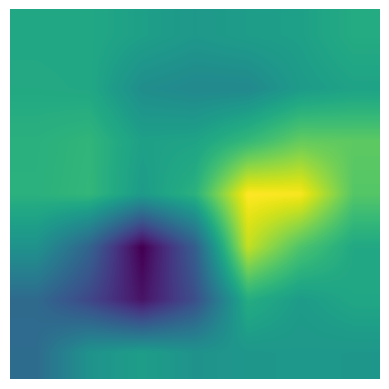

In [ ]:
plt.axis('off')
plt.imshow(cv2.resize(out[0][0][1].detach().numpy(), (224, 224)))

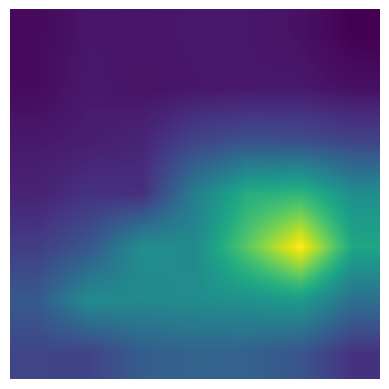

In [ ]:
plt.axis('off')
plt.imshow(cv2.resize(out[0][0][0].detach().numpy(), (224, 224)))

In [ ]:
import io
import requests
import torchvision.transforms as T
import numpy as np
from PIL import Image

from torchvision import transforms
from torchvision.utils import draw_segmentation_masks
from torchvision.ops import masks_to_boxes
from torchvision.utils import draw_bounding_boxes
from matplotlib.patches import Rectangle

from skimage.filters import threshold_otsu
import cv2

# cam_list = [GradCAM, GradCAMpp, LayerCAM]
# cam_list = [GradCAMpp]

# iou_gcam, iou_gcampp, iou_lcam = [], [], []
# contain_gcam, contain_gcampp, contain_lcam = [], [], []
# all_cams = []

pred_class, iou_score, temp_prob_val = [], [], []
p_box_list = []

alignment_network = AlignmentNetwork()
alignment_network.load_state_dict(torch.load('/content/drive/MyDrive/2feat_no_crop_fixed_pt_alignment_network_5.pth', map_location=torch.device('cpu')))
# alignment_network.load_state_dict(torch.load('/content/drive/MyDrive/fixed_pt_alignment_network_5.pth', map_location=torch.device('cpu')))
alignment_network = alignment_network.to(device)
alignment_network.eval()

for i in range(len(df_box)):
    img_path = df_box['full_path'].iloc[i]
    img = Image.open(img_path)
    img = img.convert('RGB')
    img = preprocess(img)
    # # img = img.type(torch.cuda.FloatTensor)
    out = model(img.unsqueeze(0), alignment_network, batch_masks, lung)

    # out = alignment_network(img.unsqueeze(0))
    # out = model(out, alignment_network, batch_masks)

    temp_prob_val.append(out[1].max().item())

    temp = out[1].argmax().item()
    pred_class.append(temp)
    # all_cams.append(out[0][0][temp])

    img2 = Image.open(img_path)
    img2 = img2.convert('RGB')
    preprocess_temp = T.Compose([
        T.Resize(224),
        T.CenterCrop(224),
        T.ToTensor(),
    ])
    img2 = preprocess_temp(img2)

    a = out[0][0][temp].cpu().detach().numpy()
    a = (a - np.min(a))/np.ptp(a)
    a = cv2.resize(a, (224, 224))

    if (np.isnan(a).all() == False):
      otsu_thresh = threshold_otsu(a) * 1.25
      mean = np.mean(a) * 2.05
      a[a < otsu_thresh] = np.nan

      if (np.isnan(a).all() == False):
        xmax, ymax = np.max(np.where(~np.isnan(a)), 1)
        xmin, ymin = np.min(np.where(~np.isnan(a)), 1)
        pred_boxes = torch.Tensor([xmin, ymin, xmax, ymax])
        p_box_list.append(pred_boxes)

        gt_xmin, gt_ymin, gt_w, gt_h = df_box['xmin'].iloc[i], df_box['ymin'].iloc[i], df_box['w'].iloc[i], df_box['h'].iloc[i]
        gt_xmin, gt_ymin, gt_w, gt_h = large_to_small(gt_xmin, gt_ymin, gt_w, gt_h)
        gt_xmax, gt_ymax = gt_xmin + gt_w, gt_ymin + gt_h
        gt_boxes = torch.Tensor([gt_xmin, gt_ymin, gt_xmax, gt_ymax])

        iou_score.append(jaccard(pred_boxes.reshape(-1,4), gt_boxes.reshape(-1,4)).squeeze().tolist())

      else:
        iou_score.append(0.0)

    else:
      iou_score.append(0.0)

print(np.round(np.mean(iou_score), 4))

c = 0
for i in iou_score:
    if i >= 0.1:
        c+=1
print('0.1: ', np.round((c / len(iou_score)), 3))

c = 0
for i in iou_score:
    if i >= 0.3:
        c+=1

print('0.3: ', np.round((c / len(iou_score)), 3))

c = 0
for i in iou_score:
    if i >= 0.5:
        c+=1

print('0.5: ', np.round((c / len(iou_score)), 3))

c = 0
for i in iou_score:
    if i >= 0.7:
        c+=1

print('0.7: ', np.round((c / len(iou_score)), 3))

0.1465
0.1:  0.407
0.3:  0.194
0.5:  0.088
0.7:  0.008


In [ ]:
class_names = df_box['Finding Label'].unique()

ious_temp = np.array([iou_score]).squeeze()

for c in class_names:
    iou_acc = 0
    class_indices = df_box.loc[df_box['Finding Label'] == c].index.tolist()
#     class_iou = ious_temp[class_indices].mean()
    class_iou = ious_temp[class_indices]
    for i in class_iou:
        if i >= 0.1:
            iou_acc+=1
#     contain = contain_list_temp[class_indices].sum()
    print(c + " total        " + str(len(class_indices)))
#     print(c + " iobb          " + str(class_iou.sum()))
    print(c + " iobb > 0.5 acc          " + str(np.round(iou_acc/len(class_indices), 3)))
#     print(c + " contains     " + str(contain / len(class_indices)))

Atelectasis total        180
Atelectasis iobb > 0.5 acc          0.267
Cardiomegaly total        146
Cardiomegaly iobb > 0.5 acc          0.993
Effusion total        153
Effusion iobb > 0.5 acc          0.32
Infiltrate total        123
Infiltrate iobb > 0.5 acc          0.561
Mass total        85
Mass iobb > 0.5 acc          0.153
Nodule total        79
Nodule iobb > 0.5 acc          0.0
Pneumonia total        120
Pneumonia iobb > 0.5 acc          0.542
Pneumothorax total        98
Pneumothorax iobb > 0.5 acc          0.112


In [ ]:
class_names = df_box['Finding Label'].unique()

ious_temp = np.array([iou_score]).squeeze()

for c in class_names:
    iou_acc = 0
    class_indices = df_box.loc[df_box['Finding Label'] == c].index.tolist()
#     class_iou = ious_temp[class_indices].mean()
    class_iou = ious_temp[class_indices]
    for i in class_iou:
        if i >= 0.3:
            iou_acc+=1
#     contain = contain_list_temp[class_indices].sum()
    print(c + " total        " + str(len(class_indices)))
#     print(c + " iobb          " + str(class_iou.sum()))
    print(c + " iobb > 0.5 acc          " + str(np.round(iou_acc/len(class_indices), 3)))
#     print(c + " contains     " + str(contain / len(class_indices)))

Atelectasis total        180
Atelectasis iobb > 0.5 acc          0.033
Cardiomegaly total        146
Cardiomegaly iobb > 0.5 acc          0.877
Effusion total        153
Effusion iobb > 0.5 acc          0.046
Infiltrate total        123
Infiltrate iobb > 0.5 acc          0.203
Mass total        85
Mass iobb > 0.5 acc          0.047
Nodule total        79
Nodule iobb > 0.5 acc          0.0
Pneumonia total        120
Pneumonia iobb > 0.5 acc          0.175
Pneumothorax total        98
Pneumothorax iobb > 0.5 acc          0.0


In [ ]:
iou_score[676]

0.03659207746386528

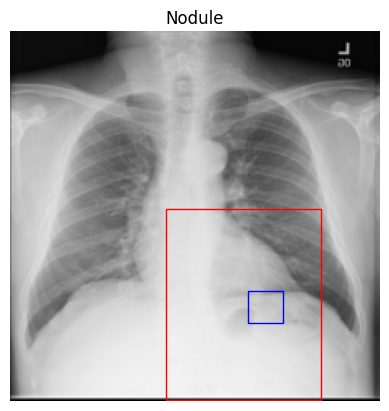

In [ ]:
from matplotlib.patches import Rectangle

temp = 676

img_path = df_box['full_path'].iloc[temp]
img = Image.open(img_path)
img = img.resize((224, 224))
img = img.convert('RGB')
# img = preprocess(img)

gt_xmin, gt_ymin, gt_w, gt_h = df_box['xmin'].iloc[temp], df_box['ymin'].iloc[temp], df_box['w'].iloc[temp], df_box['h'].iloc[temp]
gt_xmin, gt_ymin, gt_w, gt_h = large_to_small(gt_xmin, gt_ymin, gt_w, gt_h)
gt_xmax, gt_ymax = gt_xmin + gt_w, gt_ymin + gt_h
gt_boxes = torch.Tensor([gt_xmin, gt_ymin, gt_xmax, gt_ymax])
gt_rect = Rectangle((gt_boxes[0], gt_boxes[1]), gt_boxes[2]-gt_boxes[0], gt_boxes[3]-gt_boxes[1], fill=False, color='b')

pred_boxes = p_box_list[temp]
pred_rect = Rectangle((pred_boxes[0], pred_boxes[1]), pred_boxes[2]-pred_boxes[0], pred_boxes[3]-pred_boxes[1], fill=False, color='r')


fig, ax = plt.subplots()
ax.imshow(img)
ax.add_patch(gt_rect)
ax.add_patch(pred_rect)
plt.axis('off')
plt.title(df_box['Finding Label'].iloc[temp])
plt.imshow(img)
plt.show()

In [ ]:
iou_score[214]

0.7961246967315674

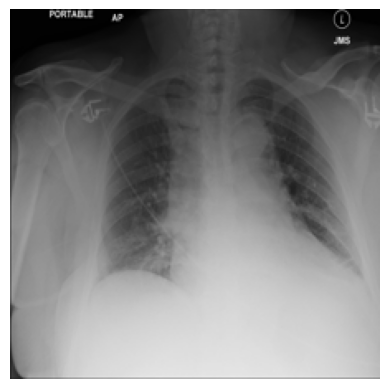

In [ ]:
from matplotlib.patches import Rectangle

temp = 214

img_path = df_box['full_path'].iloc[temp]
img = Image.open(img_path)
img = img.resize((224, 224))
img = img.convert('RGB')
plt.axis('off')
plt.imshow(img)

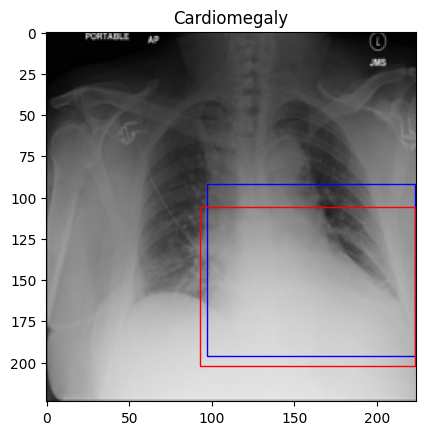

In [ ]:
from matplotlib.patches import Rectangle

temp = 214

img_path = df_box['full_path'].iloc[temp]
img = Image.open(img_path)
img = img.resize((224, 224))
img = img.convert('RGB')
# img = preprocess(img)

gt_xmin, gt_ymin, gt_w, gt_h = df_box['xmin'].iloc[temp], df_box['ymin'].iloc[temp], df_box['w'].iloc[temp], df_box['h'].iloc[temp]
gt_xmin, gt_ymin, gt_w, gt_h = large_to_small(gt_xmin, gt_ymin, gt_w, gt_h)
gt_xmax, gt_ymax = gt_xmin + gt_w, gt_ymin + gt_h
gt_boxes = torch.Tensor([gt_xmin, gt_ymin, gt_xmax, gt_ymax])
gt_rect = Rectangle((gt_boxes[0], gt_boxes[1]), gt_boxes[2]-gt_boxes[0], gt_boxes[3]-gt_boxes[1], fill=False, color='b')

pred_boxes = p_box_list[temp]
pred_rect = Rectangle((pred_boxes[0], pred_boxes[1]), pred_boxes[2]-pred_boxes[0], pred_boxes[3]-pred_boxes[1], fill=False, color='r')


fig, ax = plt.subplots()
ax.imshow(img)
ax.add_patch(gt_rect)
ax.add_patch(pred_rect)
# plt.axis('off')
plt.title(df_box['Finding Label'].iloc[temp])
plt.imshow(img)
plt.show()

In [ ]:
iou_score[959]

0.027560196816921234

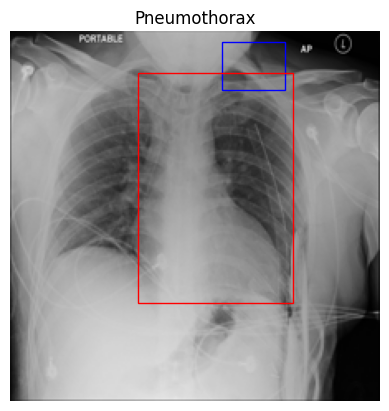

In [ ]:
from matplotlib.patches import Rectangle

temp = 959

img_path = df_box['full_path'].iloc[temp]
img = Image.open(img_path)
img = img.resize((224, 224))
img = img.convert('RGB')
# img = preprocess(img)

gt_xmin, gt_ymin, gt_w, gt_h = df_box['xmin'].iloc[temp], df_box['ymin'].iloc[temp], df_box['w'].iloc[temp], df_box['h'].iloc[temp]
gt_xmin, gt_ymin, gt_w, gt_h = large_to_small(gt_xmin, gt_ymin, gt_w, gt_h)
gt_xmax, gt_ymax = gt_xmin + gt_w, gt_ymin + gt_h
gt_boxes = torch.Tensor([gt_xmin, gt_ymin, gt_xmax, gt_ymax])
gt_rect = Rectangle((gt_boxes[0], gt_boxes[1]), gt_boxes[2]-gt_boxes[0], gt_boxes[3]-gt_boxes[1], fill=False, color='b')

pred_boxes = p_box_list[temp]
pred_rect = Rectangle((pred_boxes[0], pred_boxes[1]), pred_boxes[2]-pred_boxes[0], pred_boxes[3]-pred_boxes[1], fill=False, color='r')


fig, ax = plt.subplots()
ax.imshow(img)
ax.add_patch(gt_rect)
ax.add_patch(pred_rect)
plt.axis('off')
plt.title(df_box['Finding Label'].iloc[temp])
plt.imshow(img)
plt.show()

In [ ]:
masks = np.load('/content/drive/MyDrive/thesis_models/final_fixed_aligned_layercam_normalized_masks.npy', allow_pickle=True)
for i in range(1, 8):
    masks[i] = masks[i].squeeze(0)
for i in range(len(masks)):
    masks[i] = masks[i].to(torch.float32)

In [ ]:
temp = []
class_names = df_box['Finding Label'].unique()
for i in range(8):
  norm_image = cv2.normalize(masks[i].numpy(), None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  norm_image = norm_image.astype(np.uint8)
  norm_image = cv2.resize(norm_image, (28, 28))
  temp.append(norm_image)
  # plt.imshow(norm_image, cmap='gray', vmin=0, vmax=255)

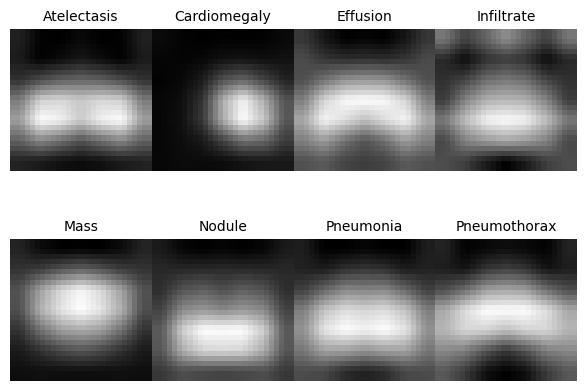

In [ ]:
f, axarr = plt.subplots(2,4)
f.tight_layout()

for ax in axarr.ravel():
    ax.set_axis_off()

axarr[0,0].set_title(class_names[0], fontsize=10)
axarr[0,0].imshow(temp[0], cmap='gray', vmin=0, vmax=255)
axarr[0,1].set_title(class_names[1], fontsize=10)
axarr[0,1].imshow(temp[1], cmap='gray', vmin=0, vmax=255)
axarr[0,2].set_title(class_names[2], fontsize=10)
axarr[0,2].imshow(temp[2], cmap='gray', vmin=0, vmax=255)
axarr[0,3].set_title(class_names[3], fontsize=10)
axarr[0,3].imshow(temp[3], cmap='gray', vmin=0, vmax=255)
axarr[1,0].set_title(class_names[4], fontsize=10)
axarr[1,0].imshow(temp[4], cmap='gray', vmin=0, vmax=255)
axarr[1,1].set_title(class_names[5], fontsize=10)
axarr[1,1].imshow(temp[5], cmap='gray', vmin=0, vmax=255)
axarr[1,2].set_title(class_names[6], fontsize=10)
axarr[1,2].imshow(temp[6], cmap='gray', vmin=0, vmax=255)
axarr[1,3].set_title(class_names[7], fontsize=10)
axarr[1,3].imshow(temp[7], cmap='gray', vmin=0, vmax=255)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
actual_class[-10:]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
actual_class[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
temp_pred = pred_class

In [ ]:
class_names = df_box['Finding Label'].unique()
actual_class = df_box['Finding Label'].replace(class_names, [0, 1, 2, 3, 4, 5, 6, 7]).to_list()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_class, temp_pred)

0.36890243902439024

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_class, pred_class)

0.36890243902439024

In [ ]:
c = 0
for i in iou_score:
    if i >= 0.1:
        c+=1
print('0.1: ', np.round((c / len(iou_score)), 3))

c = 0
for i in iou_score:
    if i >= 0.3:
        c+=1

print('0.3: ', np.round((c / len(iou_score)), 3))

c = 0
for i in iou_score:
    if i >= 0.5:
        c+=1

print('0.5: ', np.round((c / len(iou_score)), 3))

c = 0
for i in iou_score:
    if i >= 0.7:
        c+=1

print('0.7: ', np.round((c / len(iou_score)), 3))

0.1:  0.384
0.3:  0.134
0.5:  0.041
0.7:  0.007
